The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The Goal is

To predict the likelihood of a liability customer buying personal loans.

# **Import important libraries** 

---



In [95]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math 
import os 
from sklearn import preprocessing
!pip install pandas==0.25 #pandas 0.25 version is required for this code.

***Import data file to COLab***

In [96]:
from google.colab import files
upload = files.upload()

Saving Copy of Bank_Personal_Loan_Modelling.csv to Copy of Bank_Personal_Loan_Modelling (3).csv


**Read the data**

In [97]:
import io
dataset = pd.read_csv(io.BytesIO(upload['Copy of Bank_Personal_Loan_Modelling.csv']))

**To check data type**

In [98]:
dataset.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**cross check data **

In [99]:
# to display top 100 rows
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [100]:
# to display bottom 100 rows
dataset.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


You will use classification methods to predict whether a given customer accepts his/her personal loan offer. There are a total of 5,000 customers in the data set and 14 variables. A brief description of the 14 variables are given below:

1. Name Description 

2. ID Customer ID Age Customer's age in completed year 

3. Experience years of professional experience 

4. Income Annual income of the customer (1,000)

5. ZIPcode Home address ZIP code 
 
6. Family Family size of the customer

7. CCAvg Average monthly credit card spending 

8. Education Education level: 1: undergrad; 2, Graduate; 3; Advance/

9. Professional Mortgage Value of house mortgage if any  

10. Personal loan Did this customer accept the personal loan offered in he last campaign? 1, yes; 0, no 

11. Securities Acct Does the customer have a securities account with the bank? 

12. CD Account Does the customer have a certifcate of deposit (CD) account with the bank? 

13. Online Does the customer use internet bank facilities? 

1. CreditCard Does the customer use a credit card issued by the Bank?

In [101]:
#to display summary of stats 
#include mean, count, std, min, max, etc
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [102]:
#to find data consist of any null values
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Names of variable and shape of the dataset**

In [103]:
print(dataset.columns)
print(dataset.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


# **Dropping irrelavant columms**

---



In [104]:
experience = dataset['Experience']
age = dataset['Age']
correleation = experience.corr(age)
correleation

0.9942148569683321

**since age and experience is correlated we can drop experience also**

In [105]:
dataset = dataset.drop(['ID','Experience'],axis = 1)
dataset.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


# **Number of unique in each column?**

In [106]:
dataset.nunique() 

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

# **Number of people with zero mortgage?**

In [107]:
from scipy import stats
dataset['Mortgage_zscore']=abs(stats.zscore(dataset['Mortgage']))
k = 1
# printing list  
print ("The list : " + str(dataset['Mortgage']))  
# to get numbers > k 
count = 0
for i in dataset['Mortgage'] : 
    if i > k : 
        count = count + 1
 
print ("The numbers who don't have mortgage : " +str(count)) 

The list : 0        0
1        0
2        0
3        0
4        0
        ..
4995     0
4996    85
4997     0
4998     0
4999     0
Name: Mortgage, Length: 5000, dtype: int64
The numbers who don't have mortgage : 1538


Total numbers who don't have mortgage is 814.

# **Number of people with zero credit card spending per month?**

In [108]:
from scipy import stats
dataset['CCAvg_zscore']=abs(stats.zscore(dataset['CCAvg']))
k = 0
# printing list  
print ("The list : " + str(dataset['CCAvg']))  
# to get numbers > k 
count = 0
for i in dataset['CCAvg'] : 
    if i == k : 
        count = count + 1
 
print ("The numbers who don't have zero credit card spending per month : " +str(count)) 

The list : 0       1.6
1       1.5
2       1.0
3       2.7
4       1.0
       ... 
4995    1.9
4996    0.4
4997    0.3
4998    0.5
4999    0.8
Name: CCAvg, Length: 5000, dtype: float64
The numbers who don't have zero credit card spending per month : 106


Number of people with zero credit card spending per month are 92

# **Value counts of all categorical columns.**

In [109]:
dataset1 = dataset.melt(var_name='columns', value_name='index')
dataset1
for column in dataset.columns:
     print("\n" + column)
     print(dataset[column].value_counts())



Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Income
44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

CCAvg
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.

# **Univariate Analysis:**

---



Let us try to analyse the collection of data in greater detail by using pandas profiling for univariate analyses. Note: It creates profiles from a DataFrame pandas if you are not prepared for pandas profiling. The dataset.describe) (pandas function is nice but a bit simple for serious analysis of exploratory results. For quick data analysis, pandas profiling extends the DataFrame pandas to dataset.profile report).

In [110]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset)
profile.to_file("output.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


**Profile and univariate analysis points observed:**

1. 0 cells were missing in the data collection.

2. There are seven number variables for the following variables: 'Age,' 'CC 
Avg,' 'ID' and 'Enterprise'

3. There were 2 group variables: 'School' and 'Family'

4. There are 5 Boolean variables: 'Securities account,' 'CD Account' 'Credit Card,' 'Online' 'Personal Loan'

5. Personal loans have a good association with revenue, average credit card expenditure, mortgage and the customer's CD account.

6. Even the perception of age (Ţ = 0.994214857) is strongly correlated.

**Typically**

1.   42% of candidates have completed their education, while 30% are experienced and 28% are undergraduates.

2.   Roughly 29% of the family size of the consumer is 1.

**Boolean**

1.   A deposit certificate (CD) account with the bank is not issued by 94 percent of the client.

2.  Roughly 71% of the consumer does not use a UniversalBank credit card.


3. Approximately 60% of clients use internet banking.

4. Roughly 90 % of consumers do not accept the personal loan offered during the last campaign.

5. Approximately 90% of the client has no bank securities account.

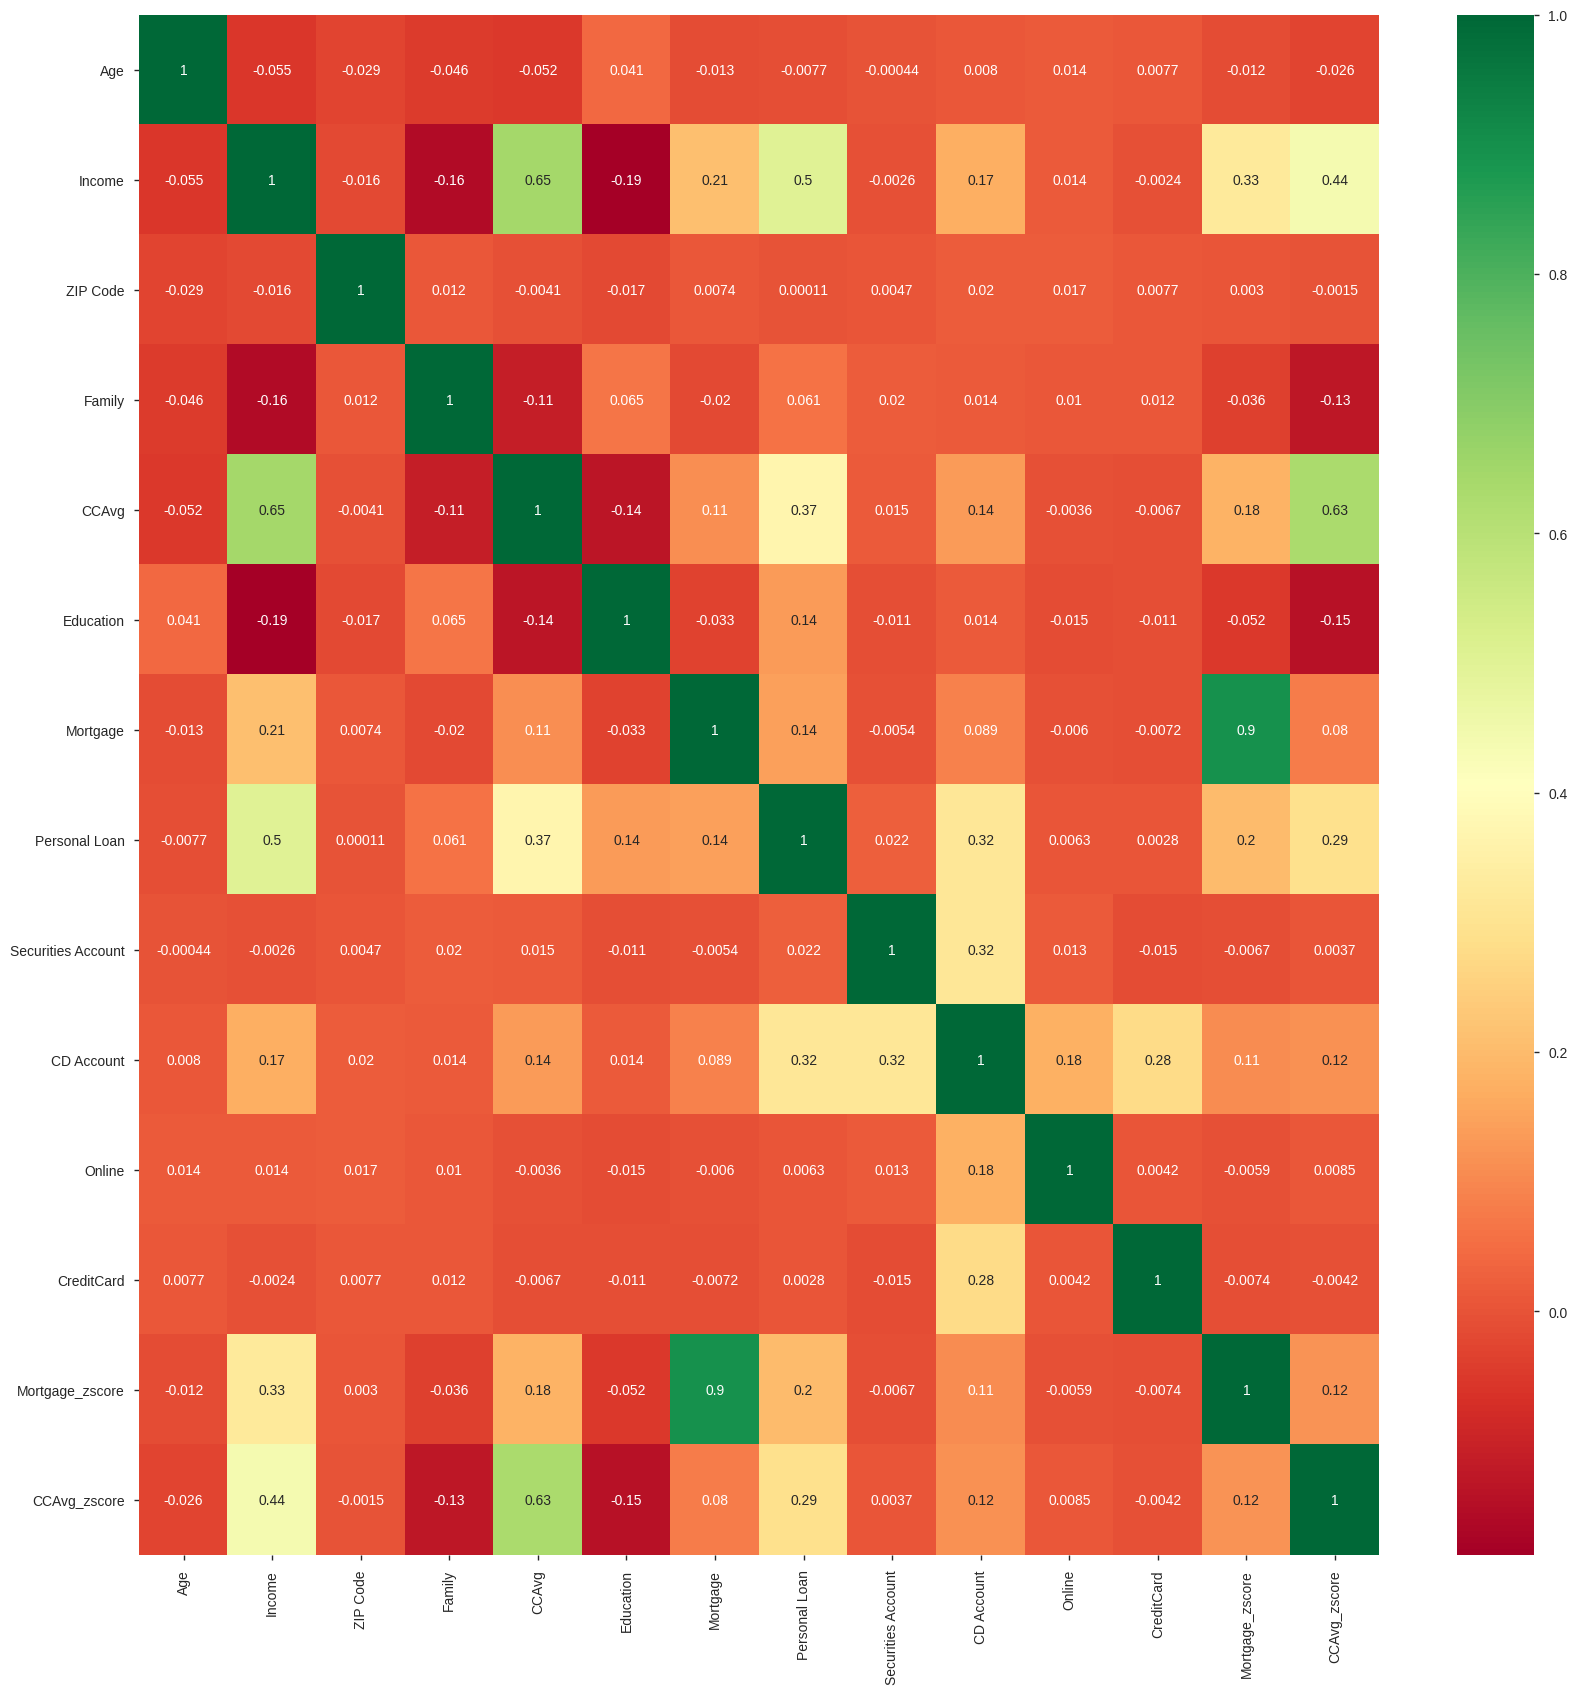

In [111]:
X1 = dataset.iloc[:,0:12]  #independent columns
y1 = dataset.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Bivariate Analysis**

---



*   The purchasing of personal loans is less feasible as large payments are feasibler for consumers with modest or low wages.

*   More family members are receiving, less likely to purchase personal loans.
*   Personal loans are likely to be acquired by consumers aged 30-50 years.

*   The consumer who graduates or undergraduates can influence the likelihood of the purchase of personal loans from a company and not from undergraduate persons who are graduates or advanced professionals.



First, the relationship between the target variable and the independent categories is found. Look now at the stacked bar plot between personal credit buyers and their level of education that gives us the share of loans bought and not bought. We use the crosstab function of the pandas for the plot, which calculates a simple cross-tabulation of two or more factors. We are also using pd.crosstab.div) (to convert it to the following percentages.

# Study the data distribution in each attribute and target variable


cross tabulation can be given as  
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cross tabulation in percentage can be given as  
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


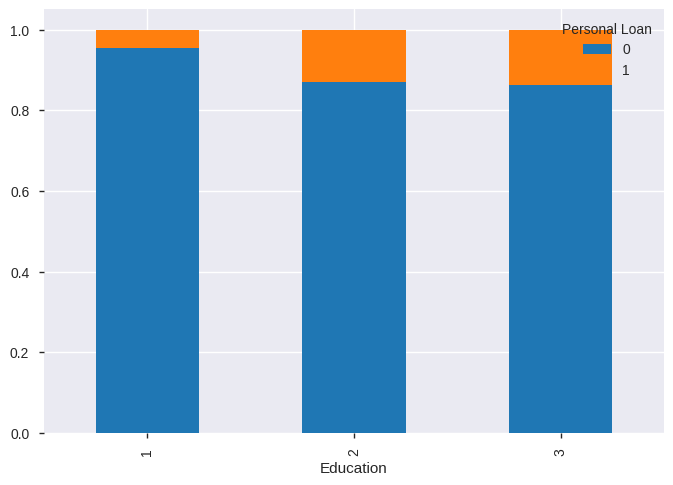

In [112]:
edu=pd.crosstab(dataset['Education'],dataset['Personal Loan'])
edu.div(edu.sum(1).astype(float), axis=0).plot(kind='bar', stacked='true' )
print('cross tabulation can be given as ' , '\n', edu)
print('cross tabulation in percentage can be given as ' , '\n', edu.div(edu.sum(1).astype(float), axis=0))

From all those parts, we can conclude that more educated customers have a greater chance of purchasing personal loans. This is why our hypothesis was true!

Let us now look at the stacked bar plot between the purchasers of personal loans and their Family size, with the same code as above, simply replacing the categorical variables:

cross tabulation can be given as  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
cross tabulation in percentage can be given as  
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


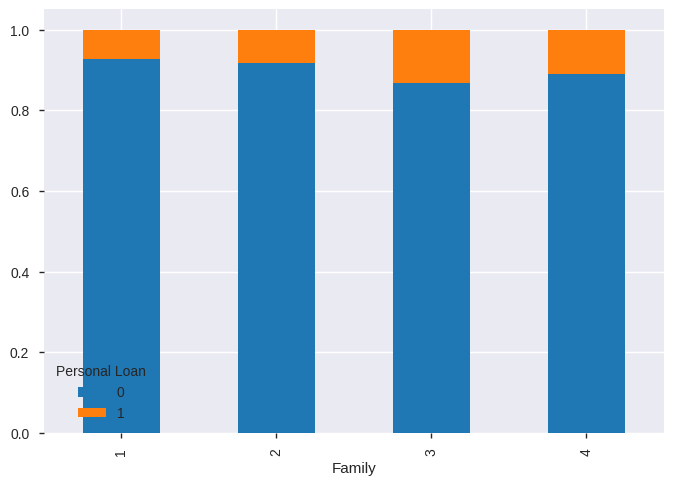

In [113]:
Family=pd.crosstab(dataset['Family'],dataset['Personal Loan'])
Family.div(Family.sum(1).astype(float), axis=0).plot(kind='bar', stacked='true' )
print('cross tabulation can be given as ' , '\n', Family)
print('cross tabulation in percentage can be given as ' , '\n', Family.div(Family.sum(1).astype(float), axis=0))

There is no significant impact on probability on the number of family members. It therefore contradicts our assumption that the number of family members affects the likelihood.

Let us now compare between the personal loan buyers who use or doesn’t use a credit card issued by :

cross tabulation can be given as  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
cross tabulation in percentage can be given as  
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


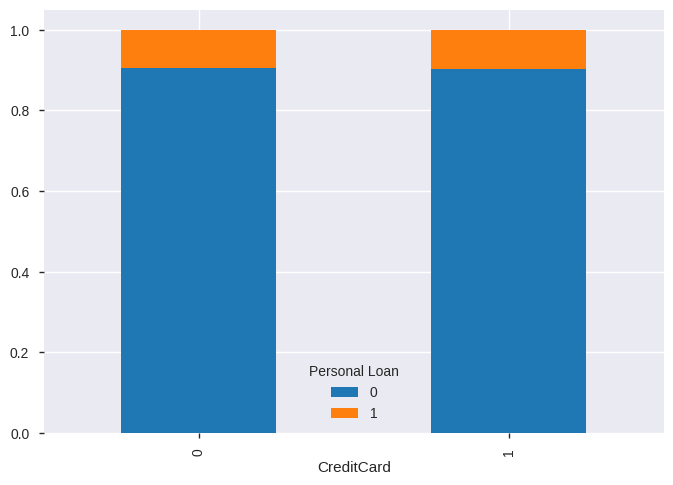

In [114]:
CreditCard=pd.crosstab(dataset['CreditCard'],dataset['Personal Loan'])
CreditCard.div(CreditCard.sum(1).astype(float), axis=0).plot(kind= 'bar', stacked='true' )
print('cross tabulation can be given as ' , '\n', CreditCard)
print('cross tabulation in percentage can be given as ' , '\n', CreditCard.div(CreditCard.sum(1).astype(float), axis=0))

The customer using or who does not use a credit card does not appear to affect the likelihood that a personal credit is purchased.

*Let* us now compare the personal loan buyer’s customer who uses or doesn’t use internet banking facilities:

cross tabulation can be given as  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
cross tabulation in percentage can be given as  
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


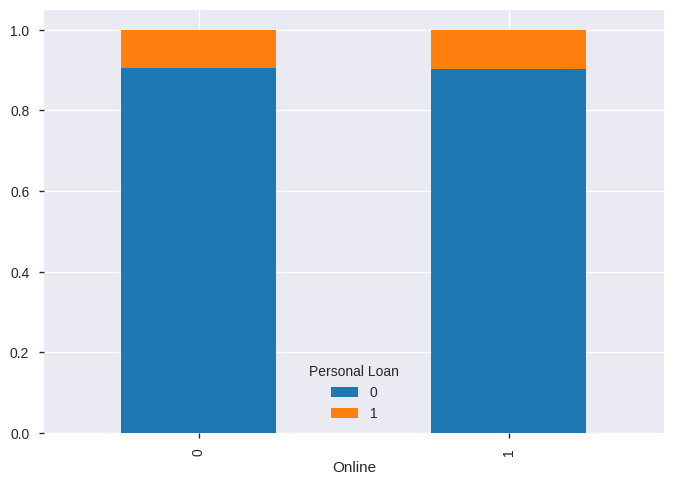

In [115]:
Online=pd.crosstab(dataset['Online'],dataset['Personal Loan'])
Online.div(Online.sum(1).astype(float), axis=0).plot(kind= 'bar', stacked='true' )
print('cross tabulation can be given as ' , '\n', Online)
print('cross tabulation in percentage can be given as ' , '\n', Online.div(Online.sum(1).astype(float), axis=0))

The user who uses Internet banking facilities or does not use these services does not seem to impact the likelihood of obtaining personal loans.

Let us now compare between the personal loan buyer’s customer who has or doesn’t have a securities account with the bank:

cross tabulation can be given as  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
cross tabulation in percentage can be given as  
 Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


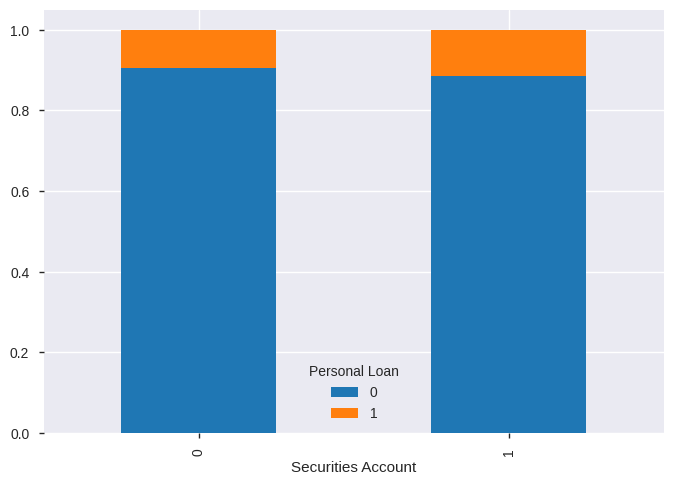

In [116]:
Securities_Account=pd.crosstab(dataset['Securities Account'],dataset['Personal Loan'])
Securities_Account.div(Securities_Account.sum(1).astype(float), axis=0).plot(kind= 'bar', stacked='true' )
print('cross tabulation can be given as ' , '\n', Securities_Account  )
print('cross tabulation in percentage can be given as ' , '\n', Securities_Account.div(Securities_Account.sum(1).astype(float), axis=0))

The probability of buying a personal loan is not impacted by clients who have or do not have a securities account with the bank.

We will try to find the mean of the independent number variable for which customers purchase the personal loan versus the average of the numeric variables. Here we had a DataFrame.groupby function, where the object is divided, a function used, and results combined. It can be used to group large quantities of data in these classes and to compute operations.

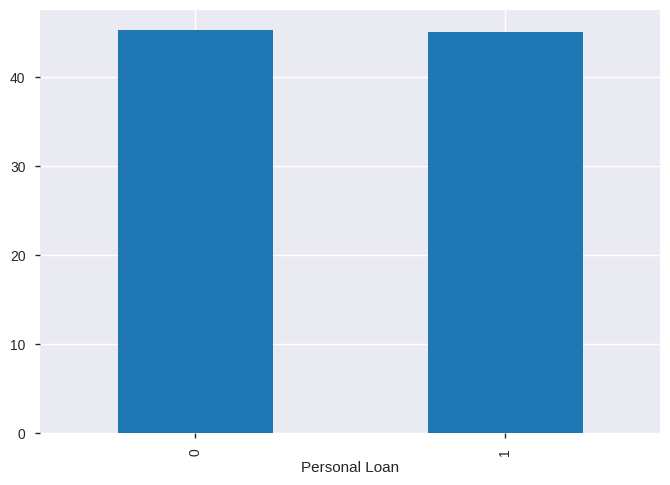

In [117]:
dataset.groupby('Personal Loan')['Age'].mean().plot(kind='bar')

The y-axis is the mean candidate age in this situation. In the middle age, we see no improvement. Let us, therefore, create bins on the applicant 's value and evaluate the corresponding loan status for each bin for the applicant age variable. We used pandas.cut to create bins that are used to segment data values and sort them into bins. This function can also be used to switch from a continuous to a categorical variable. We then use the same function as pandas.crosstab (& DataFrame.div) to draw a graph in the bar that can be displayed as:

The applicants 'old age does not affect the chances of purchasing their personal loan which conflict with our hypothesis that the applicants' age is an significant factor in the purchase of the loan.

Now let us look at the average monthly credit card expenditure of the personal loan buyer. The simple group by function as used above can be performed:

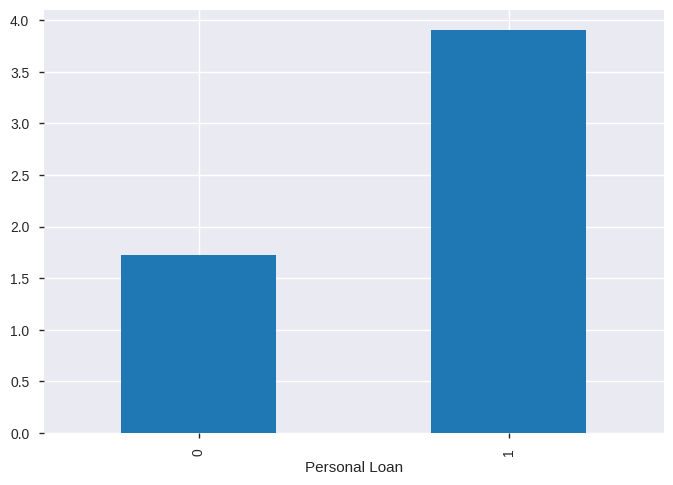

In [118]:
dataset.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

Here the y-axis is the average credit card payment per month for applicants. It is clear that borrowers who spend more on credit cards will make their personal loans more viable.

Let us look now how the income of the customer affect the possibility of a liability customer. We will be again using groupby() and mean() function to throw some light on it:

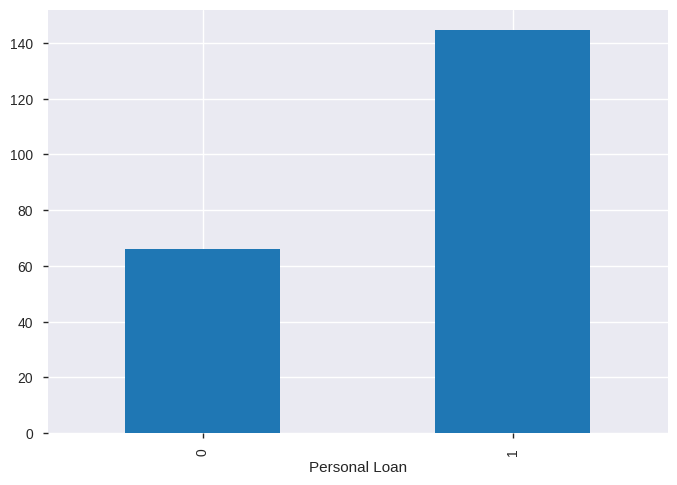

In [119]:
dataset.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

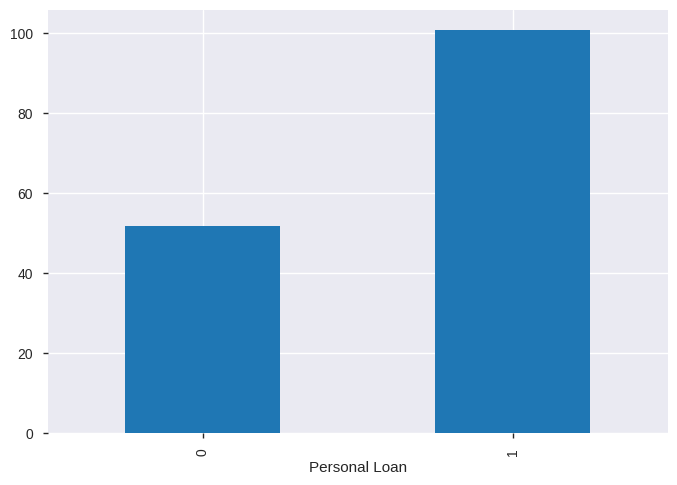

In [120]:
dataset.groupby('Personal Loan')['Mortgage'].mean().plot(kind='bar')

The y-axis here reflects the customer's average annual income . It is clear that high-income customers can more easily purchase personal lending which goes against our hypothesis that high wage payments can be less feasible in order to purchase personal lending whereas medium or low-income customers are more likely to acquire personal lending.

# **Build various other classification algorithms and compare their performance**

---



From the above analysis of Univariate and Bivariate the elements which effect the liability of Personal Loan are - Age, along with experience affects the Personal Loan. similarly Income, Education, Mortgage, CD Account also effect Personal Loan.

In [121]:
from sklearn.model_selection import train_test_split #importing library for splitting the data
from sklearn.linear_model import LogisticRegression  #importing model 
from sklearn.metrics import accuracy_score           #importing library to check the accuracy of the model 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
X = dataset[["Income","Education","Mortgage","Age","CD Account"]]
Feature = dataset[["Income","Education","Mortgage","Age","CD Account"]]
#X = dataset.drop("Personal Loan")
y = dataset['Personal Loan']
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

**Logistic Regression**

In [122]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)

In [123]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
JC1 = jaccard_score(y_test, LR_yhat)
FS1 = f1_score(y_test, LR_yhat, average='weighted') 
LL = log_loss(y_test, LR_yhat_prob)

**K Nearest Neighbor(KNN)**

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 4
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    KNN_yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, KNN_yhat)
    std_acc[n-1] = np.std(KNN_yhat==y_test)/np.sqrt(KNN_yhat.shape[0])
mean_acc
JC2 = jaccard_score(y_test, KNN_yhat)
FS2 = f1_score(y_test, KNN_yhat , average='weighted')

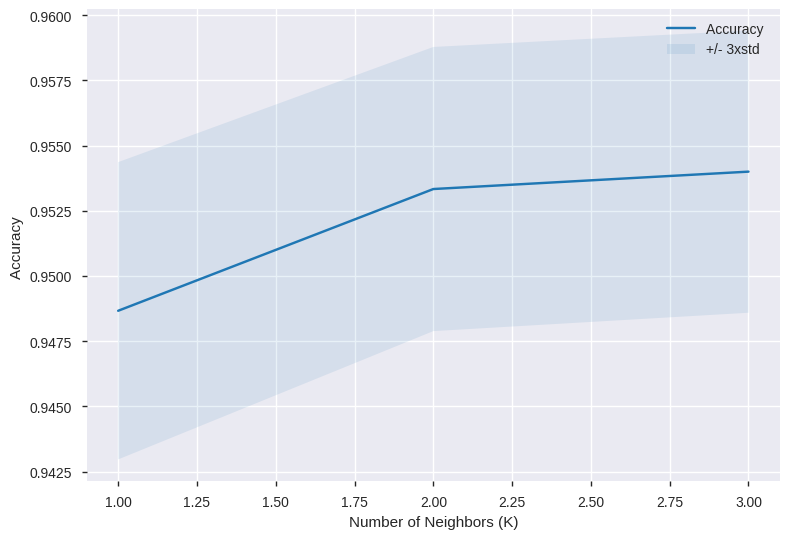

The best accuracy was with 0.954 with k= 3


In [125]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)

**Support Vector Machine SVM**

In [126]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

#Modelling
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)
SVM_yhat = clf.predict(X_test)
JC3 = jaccard_score(y_test, SVM_yhat)
FS3 = f1_score(y_test, SVM_yhat, average='weighted')

**DecisionTreeClassifier**

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
import graphviz 
import pydotplus

#Modelling
modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(X_train, y_train)

#Prediction
DT_yhat = modeltree.predict(X_test)
JC4 = jaccard_score(y_test, DT_yhat)
FS4 = f1_score(y_test, DT_yhat, average='weighted')

0.5759162303664922 0.9459203027083981


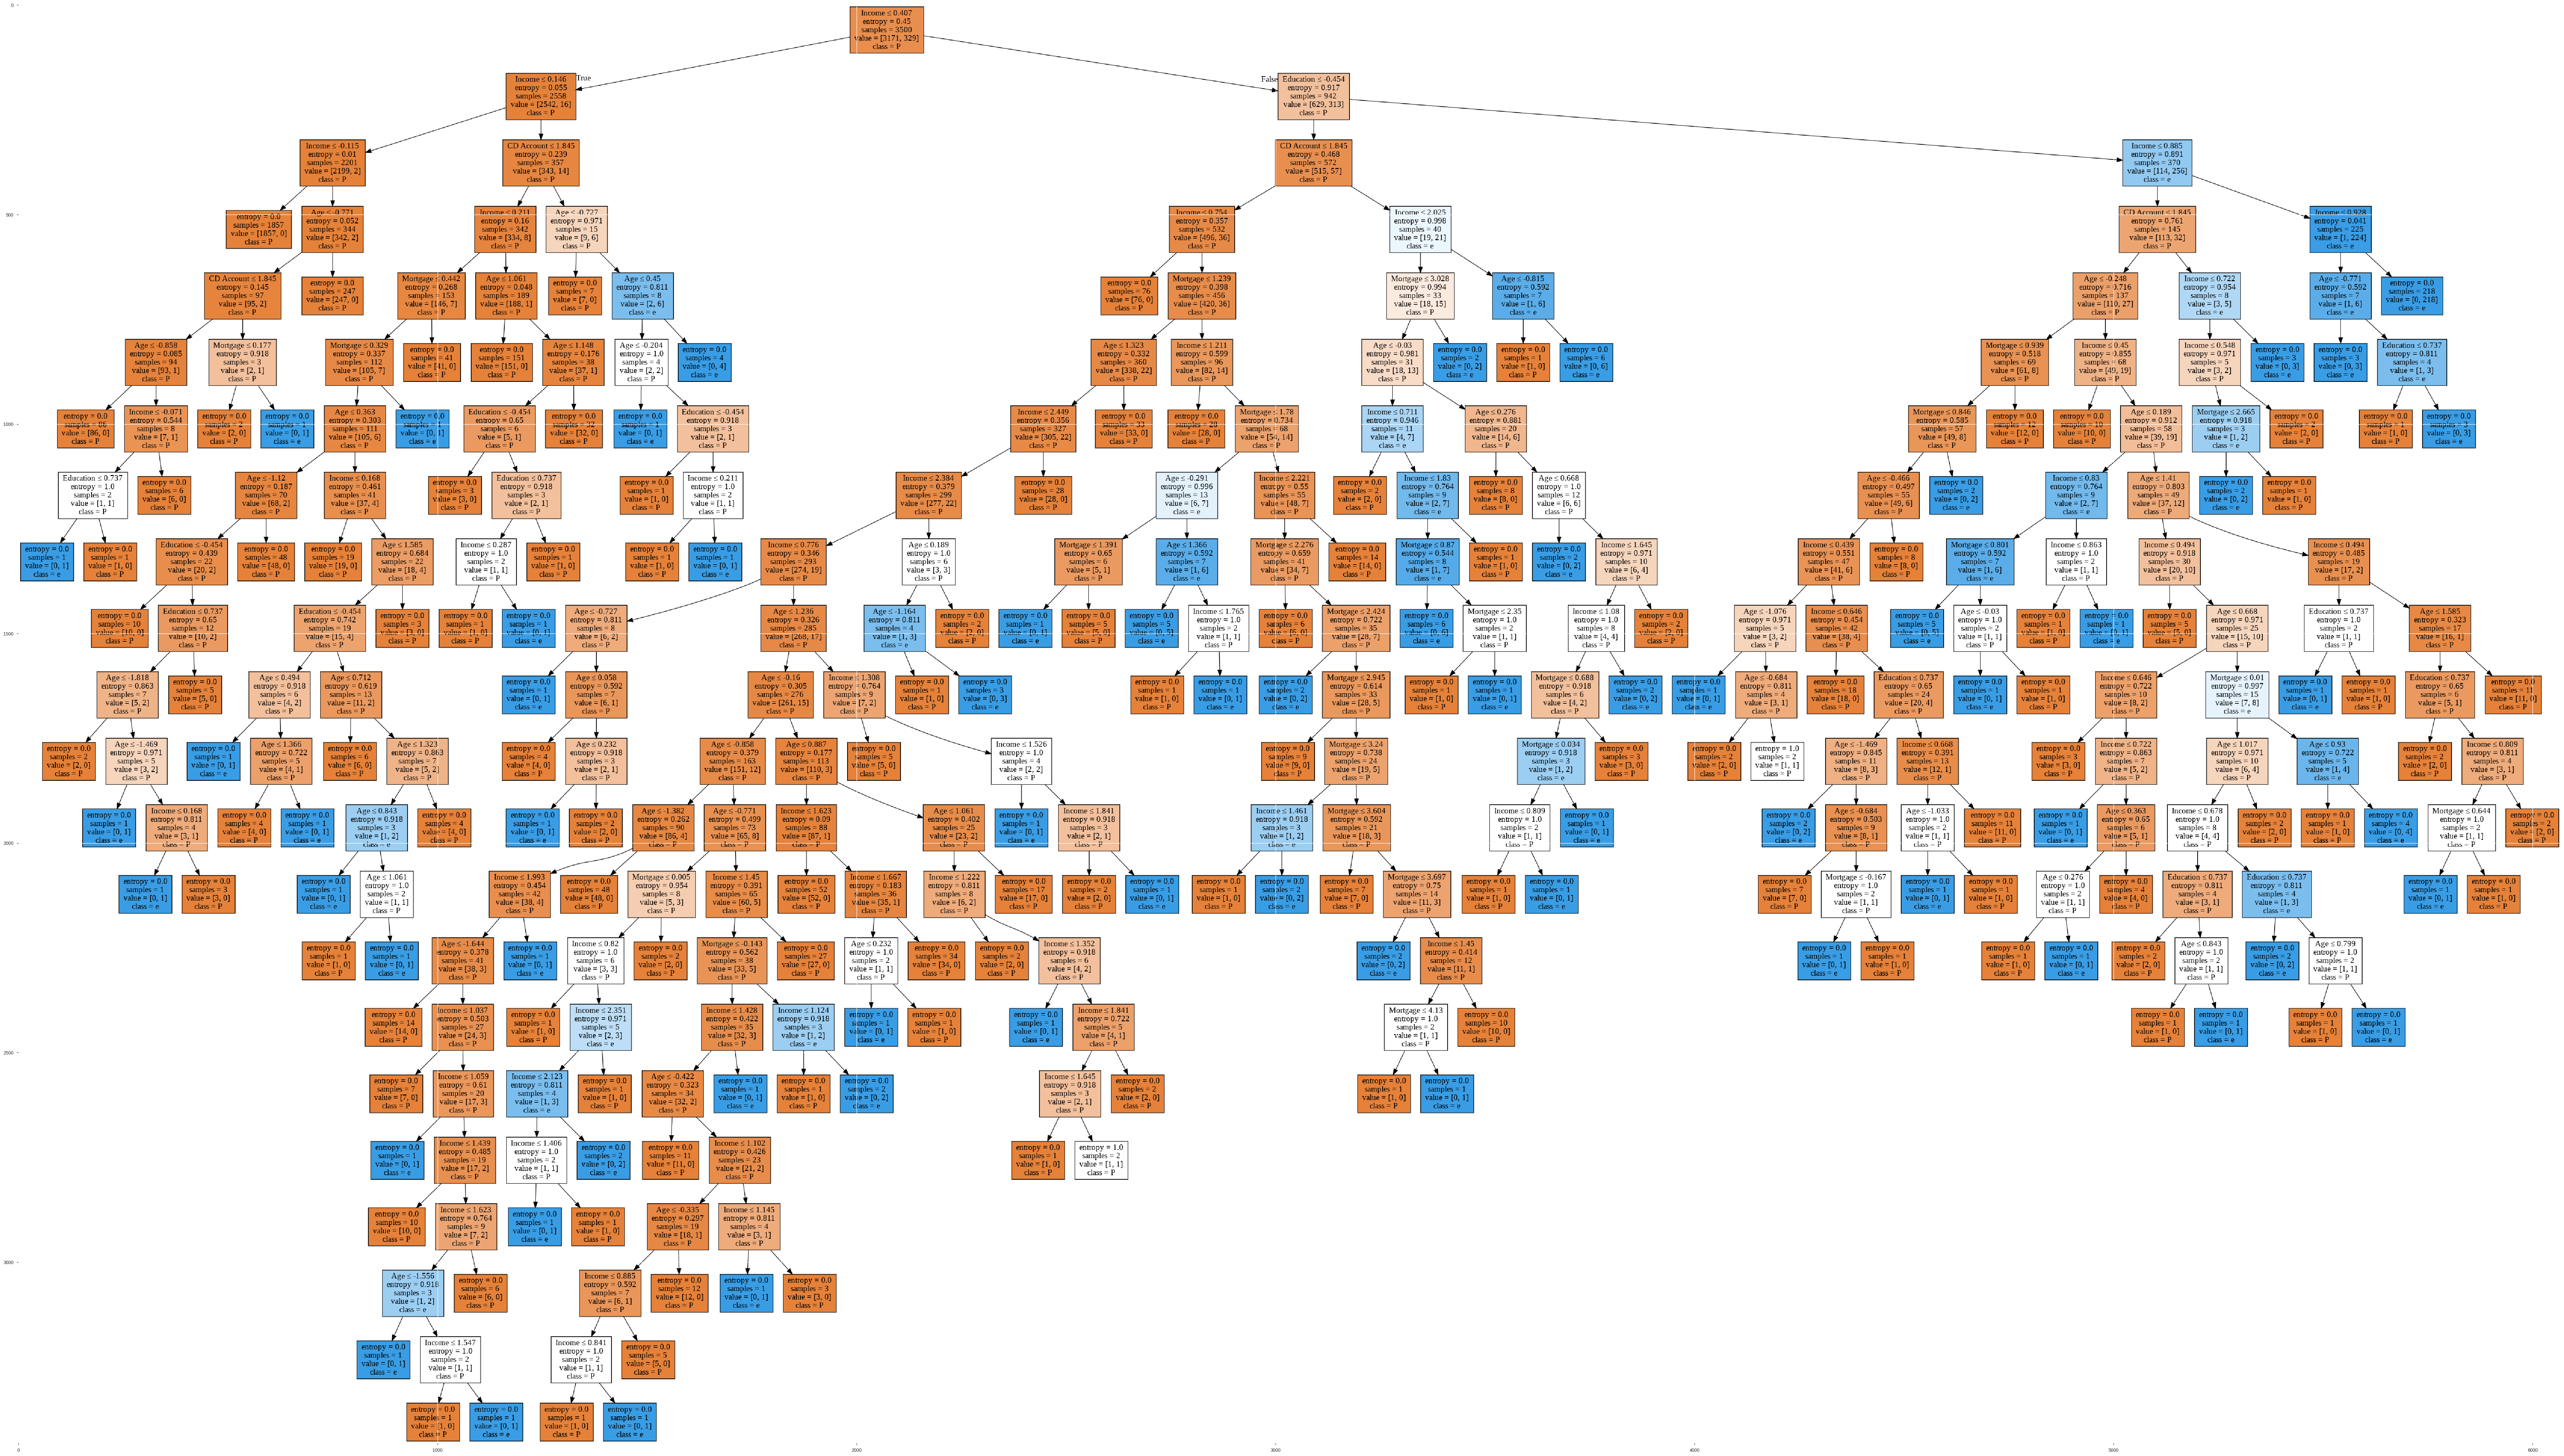

In [128]:
dot_data = StringIO()
filename = "tree.png"
out=tree.export_graphviz(modeltree,feature_names=Feature.columns, out_file=dot_data, class_names= "Personal Loan", filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# **Model Evaluation using Test set**

In [129]:
list_JC = [JC1, JC2, JC3, JC4]
list_FS = [FS1, FS2, FS3, FS4]
list_LL = [LL,'NA', 'NA', 'NA']
# fomulate the report format
dataset = pd.DataFrame(list_JC, index=['Logistic Regression','KNN','SVM','Decision Tree'])
dataset.columns = ['Jaccard']
dataset.insert(loc=1, column='F1-score', value=list_FS)
dataset.insert(loc=2, column='LogLoss', value=list_LL)
dataset.columns.name = 'Algorithm'
dataset


Algorithm,Jaccard,F1-score,LogLoss
Logistic Regression,0.436364,0.930227,0.2119
KNN,0.591716,0.951456,NA
SVM,0.184332,0.872637,NA
Decision Tree,0.575916,0.945920,NA


# **Business understanding of My Model:**

From the previous campaign we found that data which is used to find relavent reason or chances of a perticular methodology to find liability of costumer buying Personal Loan.

We have many methodologies to find percentage of people accepting personal Loan.
In similar way I had we classification method I mean the main data which is effecting or influencing people to accept or take a Personal Loan.
As per my analysis Age and Experience are same or we can say Correlated, People with he/she must be atleast a Graduate with atleast 20 years of experience, with income of 70$ LONG WITH CCAvg of 2, are most likely accept or buy Personal Loan.
